# Verlet Algorithm

In [1]:
import simtk.unit as unit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
system = spring_and_mass(mass=0.2*unit.kilogram, k=10.0*unit.joules/unit.meters**2)

In [4]:
system.force(np.array([1.0, 0.0, 0.0]) * unit.meters)

Quantity(value=array([-10.,  -0.,  -0.]), unit=newton)

In [5]:
system.potential_energy(np.array([1.0, 0.0, 0.0]) * unit.meters)

Quantity(value=5.0, unit=joule)

In [6]:
system.kinetic_energy(np.array([1.0, 0.0, 0.0]) * unit.meters/unit.seconds)

Quantity(value=0.1, unit=joule)

In [7]:
initial_conditions = {
    'position' : np.array([1.0, 0.0, 0.0]) * unit.meters,
    'velocity' : np.array([0.0, 0.0, 0.0]) * unit.meters/unit.seconds,
    'time' : 0.0 * unit.seconds
}

In [8]:
integration_timestep = 0.005 * unit.seconds
n_steps = 2000

In [16]:
def integrator(system, initial_conditions, integration_timestep, n_steps):
    
    time_i = initial_conditions['time']
    position_i = initial_conditions['position']
    velocity_i = initial_conditions['velocity']
    force_i = system.force(position_i)
    kinetic_energy_i = system.kinetic_energy(velocity_i)
    potential_energy_i = system.potential_energy(position_i)
    
    positions = np.empty([n_steps, 3]) * unit.meters
    velocities = np.empty([n_steps, 3]) * unit.meters/unit.seconds
    kinetic_energy = np.empty([n_steps]) * unit.joules
    potential_energy = np.empty([n_steps]) * unit.joules
    times = np.empty([n_steps]) * unit.seconds
    
    positions[0,:] = position_i
    velocities[0,:] = velocity_i
    times[0] = time_i
    kinetic_energy[0] = kinetic_energy_i
    potential_energy[0] = potential_energy_i

    for step_index in range(1,n_steps):
    
        position_f = position_i + velocity_i * integration_timestep + \
                     0.5 * (force_i/system.mass) * integration_timestep**2
        velocity_f = velocity_i + force_i/system.mass * integration_timestep
        force_f = system.force(position_f)
        time_f = time_i + integration_timestep
    
        positions[step_index,:] = position_f
        velocities[step_index,:] = velocity_f
        times[step_index] = time_f
        kinetic_energy[step_index] = system.kinetic_energy(velocity_f)
        potential_energy[step_index] = system.potential_energy(position_f)

        position_i = position_f
        velocity_i = velocity_f
        time_i = time_f
        force_i = force_f
        
    return positions, velocities, times, kinetic_energy, potential_energy

In [17]:
positions, velocities, times, kinetic_energy, potential_energy = integrator(system, 
                                            initial_conditions, integration_timestep, n_steps)

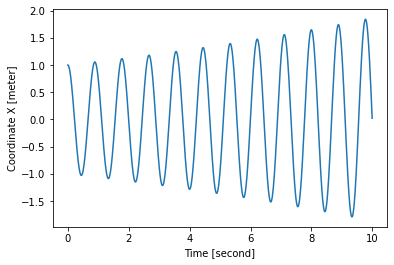

In [24]:
plt.plot(times, positions[:,0])
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Coordinate X [{}]'.format(positions.unit))

plt.show()

In [19]:
total_energy = potential_energy + kinetic_energy

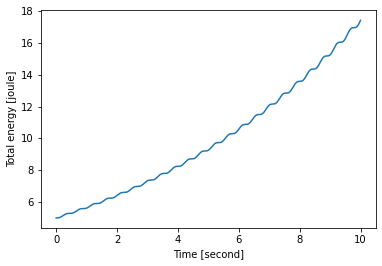

In [25]:
plt.plot(times, total_energy[:])
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Total energy [{}]'.format(total_energy.unit))

plt.show()

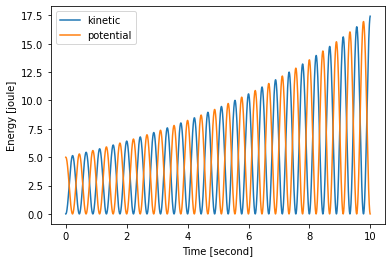

In [26]:
plt.plot(times, kinetic_energy[:], label='kinetic')
plt.plot(times, potential_energy[:], label='potential')
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Energy [{}]'.format(total_energy.unit))
plt.legend()
plt.show()

El sistema va ganando energía!!! De donde?

Es reversible?

In [27]:
initial_conditions = {
    'position' : positions[-1],
    'velocity' : velocities[-1],
    'time' : times[-1]
}

In [28]:
positions_rev, velocities_rev, times_rev, kinetic_energy_rev, potential_energy_rev = \
integrator(system, initial_conditions, -integration_timestep, n_steps)

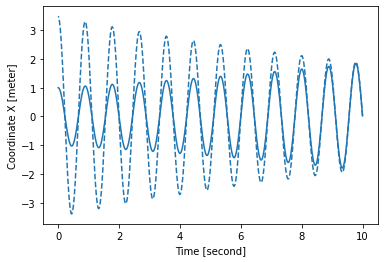

In [37]:
plt.plot(times, positions[:,0])
plt.plot(times_rev, positions_rev[:,0], '--', color='#1f77b4')
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Coordinate X [{}]'.format(positions.unit))

plt.show()

In [38]:
total_energy_rev = potential_energy_rev + kinetic_energy_rev

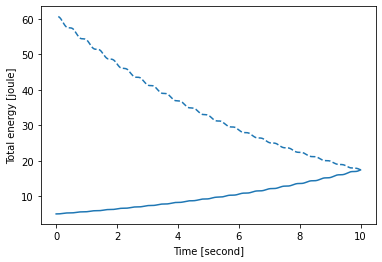

In [40]:
plt.plot(times, total_energy[:])
plt.plot(times_rev, total_energy_rev[:], '--', color='#1f77b4')
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Total energy [{}]'.format(total_energy.unit))

plt.show()

http://docs.openmm.org/latest/userguide/theory.html#verletintegrator    
https://manual.gromacs.org/current/reference-manual/algorithms/molecular-dynamics.html#the-leap-frog-integrator    
